# Data structures accepted by seaborn

As a data visualization library, seaborn requires that you provide it with data. This chapter explains the various ways to accomplish that task. Seaborn supports several different dataset formats, and most functions accept data represented with objects from the pandas or numpy libraries as well as built-in Python types like lists and dictionaries. Understanding the usage patterns associated with these different options will help you quickly create useful visualizations for nearly any dataset.

### Long-form vs. wide-form data
Most plotting functions in seaborn are oriented towards vectors of data. When plotting x against y, each variable should be a vector. Seaborn accepts data sets that have more than one vector organized in some tabular fashion. There is a fundamental distinction between “long-form” and “wide-form” data tables, and seaborn will treat each differently.

Long-form data
A long-form data table has the following characteristics:

* Each variable is a column
* Each observation is a row

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


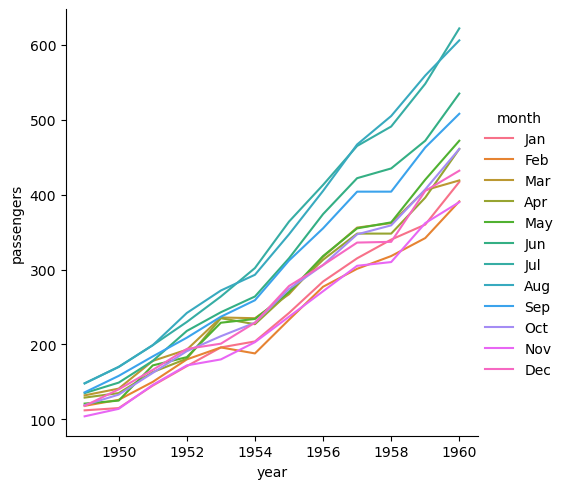

In [3]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

### Wide-form data
For simple datasets, it is often more intuitive to think about data the way it might be viewed in a spreadsheet, where the columns and rows contain levels of different variables. For example, we can convert the flights dataset into a wide-form organization by “pivoting” it so that each column has each month’s time series over years

In [4]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


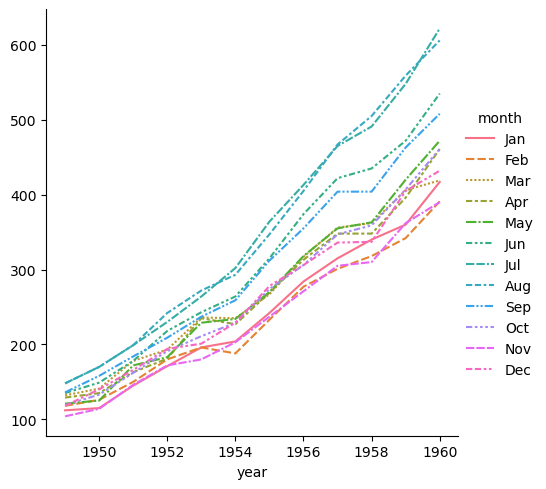

In [5]:
sns.relplot(data=flights_wide, kind="line")

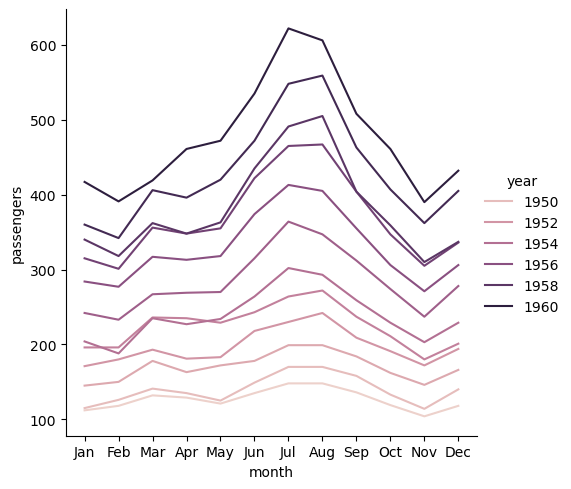

In [6]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

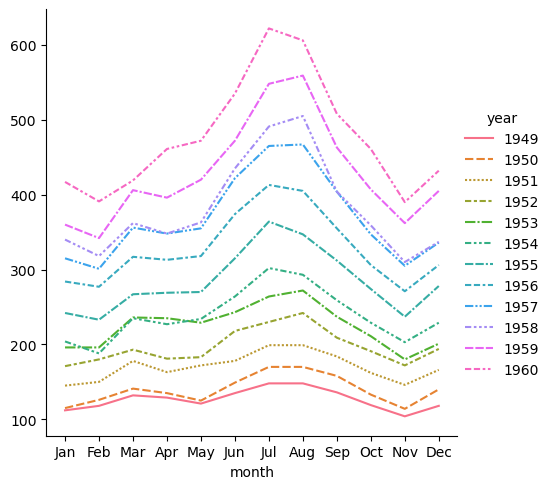

In [7]:
sns.relplot(data=flights_wide.transpose(), kind="line")

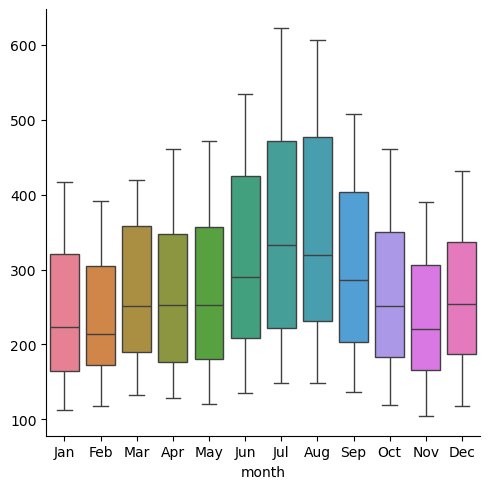

In [8]:
sns.catplot(data=flights_wide, kind="box")

### Messy data
Many datasets cannot be clearly interpreted using either long-form or wide-form rules. If datasets that are clearly long-form or wide-form are “tidy”, we might say that these more ambiguous datasets are “messy”. In a messy dataset, the variables are neither uniquely defined by the keys nor by the dimensions of the table. This often occurs with repeated-measures data, where it is natural to organize a table such that each row corresponds to the unit of data collection. Consider this simple dataset from a psychology experiment in which twenty subjects performed a memory task where they studied anagrams while their attention was either divided or focused

In [9]:
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


In [10]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


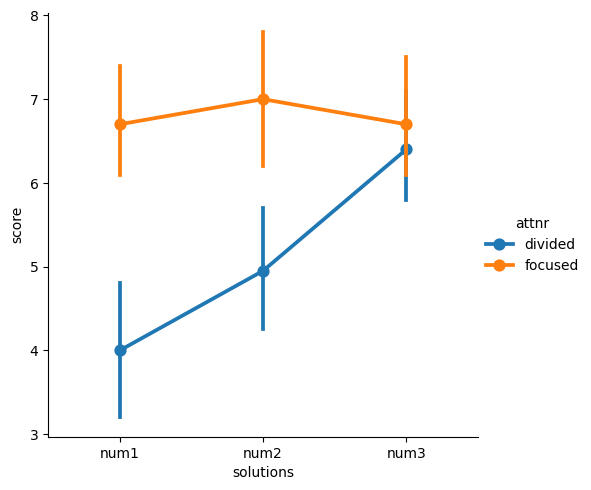

In [11]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

## Further reading and take-home points
For a longer discussion about tabular data structures, you could read the “Tidy Data” paper by Hadley Whickham. Note that seaborn uses a slightly different set of concepts than are defined in the paper. While the paper associates tidyness with long-form structure, we have drawn a distinction between “tidy wide-form” data, where there is a clear mapping between variables in the dataset and the dimensions of the table, and “messy data”, where no such mapping exists.

The long-form structure has clear advantages. It allows you to create figures by explicitly assigning variables in the dataset to roles in plot, and you can do so with more than three variables. When possible, try to represent your data with a long-form structure when embarking on serious analysis. Most of the examples in the seaborn documentation will use long-form data. But in cases where it is more natural to keep the dataset wide, remember that seaborn can remain useful.

# Options for visualizing long-form data
While long-form data has a precise definition, seaborn is fairly flexible in terms of how it is actually organized across the data structures in memory. The examples in the rest of the documentation will typically use pandas.DataFrame objects and reference variables in them by assigning names of their columns to the variables in the plot. But it is also possible to store vectors in a Python dictionary or a class that implements that interface

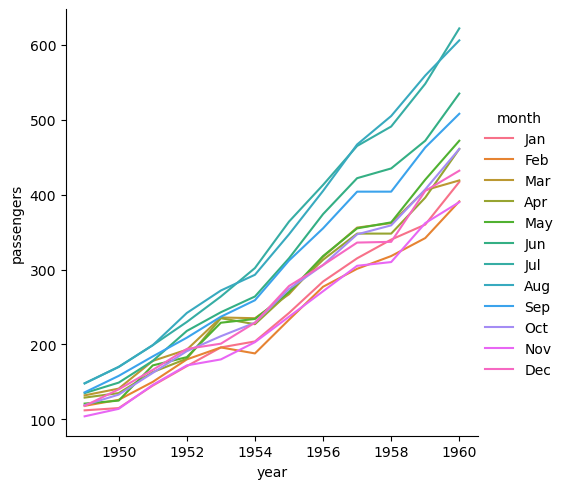

In [12]:
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

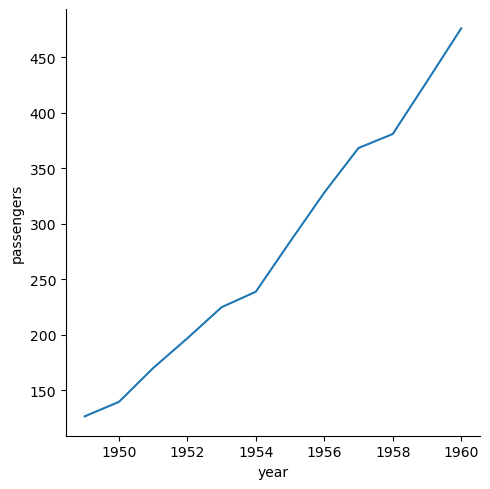

In [13]:
flights_avg = flights.groupby("year").mean(numeric_only=True)
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line")

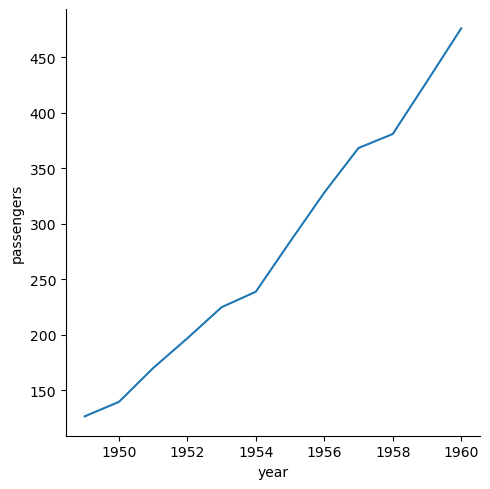

In [14]:
year = flights_avg.index
passengers = flights_avg["passengers"]
sns.relplot(x=year, y=passengers, kind="line")

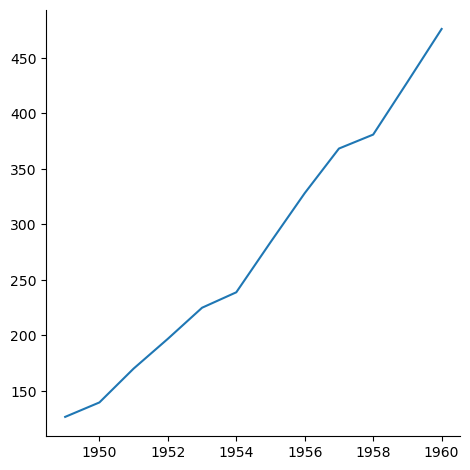

In [15]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line")

### Options for visualizing wide-form data
The options for passing wide-form data are even more flexible. As with long-form data, pandas objects are preferable because the name (and, in some cases, index) information can be used. But in essence, any format that can be viewed as a single vector or a collection of vectors can be passed to data, and a valid plot can usually be constructed.

The example we saw above used a rectangular pandas.DataFrame, which can be thought of as a collection of its columns. A dict or list of pandas objects will also work, but we’ll lose the axis labels

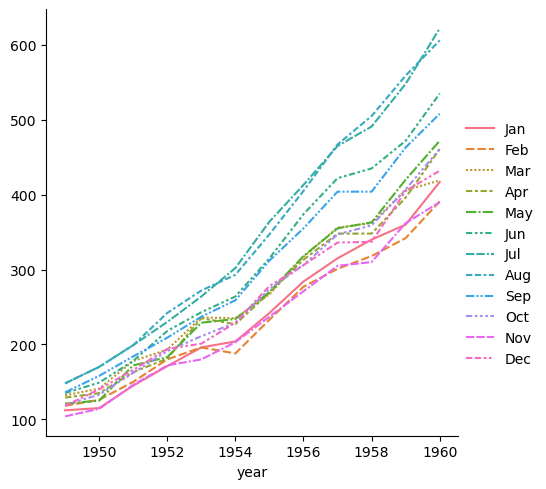

In [16]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind="line")

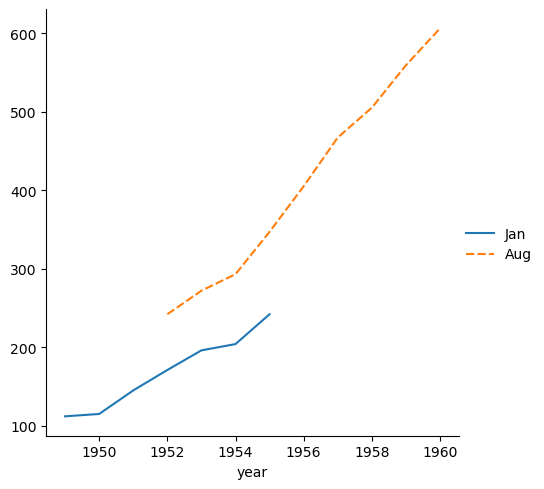

In [17]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line")

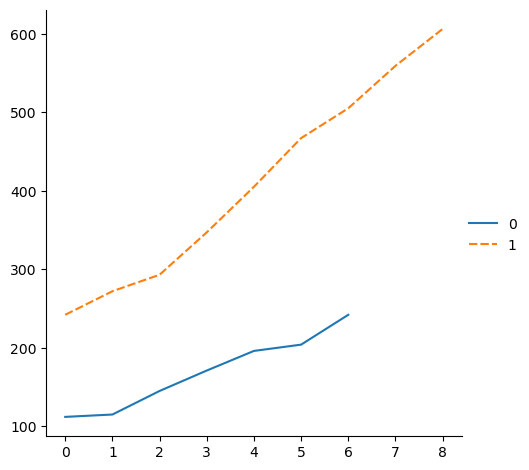

In [18]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line")

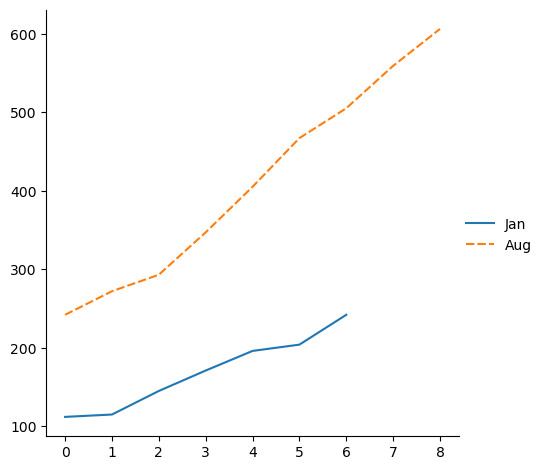

In [19]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

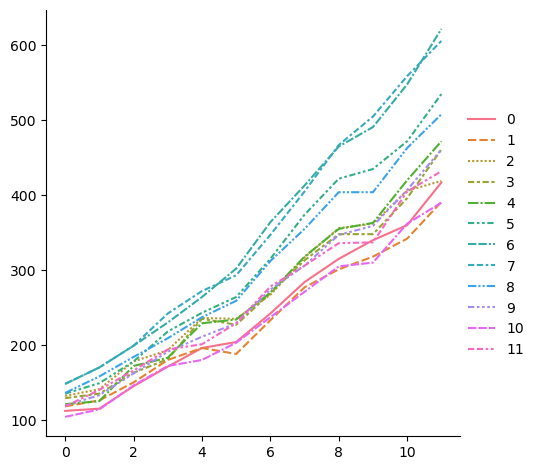

In [20]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line")